In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## 開始檢視不同欄位是否有異常值

### 檢查申請貸款時的年齡 - DAYS_BIRTH

In [13]:
# DAYS_BIRTH: 客戶申請貸款時的年齡
print(app_train['DAYS_BIRTH'])
print("=======================")
print(app_train['DAYS_BIRTH'] / -365)
print("=======================")
print((app_train['DAYS_BIRTH'] / -365).describe())

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64
0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


### 檢查申請貸款前，申請人已在現職工作的時間 - DAYS_EMPLOYED

In [16]:
# DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間
print(app_train["DAYS_EMPLOYED"])
print("=======================")
print(app_train["DAYS_EMPLOYED"] / -365)
print("=======================")
print((app_train["DAYS_EMPLOYED"] / -365).describecribe())

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64
0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507   -1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64
count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64


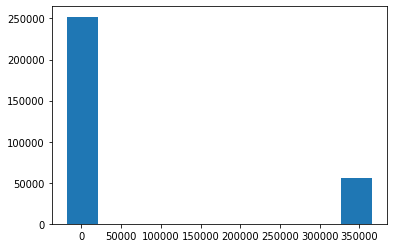

In [19]:
plt.hist(app_train["DAYS_EMPLOYED"])
plt.show()

In [20]:
#檢查每個unique值的數量
app_train["DAYS_EMPLOYED"].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### 結論是365243是個異常的數字

In [27]:
## 過濾出所有'DAYS_EMPLOYED'等於365243的數據
anom = app_train[app_train["DAYS_EMPLOYED"] == 365243]
anom

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [30]:
## 其餘的正常數據
non_anom = app_train[~(app_train["DAYS_EMPLOYED"] == 365243)]
non_anom

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 檢視異常數據中為我們的貸款目標(TARGET)占了多少(比例)

In [34]:
## 由於TARGET裡面為0, 1，所以使用平均數計算，就能得到在異常數據中為我們的目標(TARGET == 1)占了多少
anom["TARGET"].mean()
print('The anomalies default on %0.2f%% loans' % (anom['TARGET'].mean() * 100))

The anomalies default on 5.40% loans


## 檢視正常數據中為我們的貸款目標(TARGET)占了多少(比例)

In [35]:
non_anom["TARGET"].mean()
print('The non_anomalies default on %0.2f%% loans' % (non_anom['TARGET'].mean() * 100))

The non_anomalies default on 8.66% loans


## 有多少筆的異常就業天數數據和其佔比 - 'DAYS_EMPLOYED'

In [49]:
anom_num = len(anom["DAYS_EMPLOYED"])
print('the percentage of anom DAYS_EMPLOYED is %0.3f' %(sum(anom["DAYS_EMPLOYED"]) / anom_num))

the percentage of anom DAYS_EMPLOYED is 365243.000


## 創建一個特徵欄位 - DAYS_EMPLOYED_ANOM 來紀錄 DAYS_EMPLOYED 是否異常

In [50]:
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] == 365243
app_train.loc[:, ["DAYS_EMPLOYED", "DAYS_EMPLOYED_ANOM"]]

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOM
0,-637,False
1,-1188,False
2,-225,False
3,-3039,False
4,-3038,False
...,...,...
307506,-236,False
307507,365243,True
307508,-7921,False
307509,-4786,False


In [51]:
print(app_train["DAYS_EMPLOYED_ANOM"].value_counts())

False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


## 將DAYS_EMPLOYED中的異常值以 NaN來取代

In [55]:
app_train["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)
app_train['DAYS_EMPLOYED']

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
           ...  
307506    -236.0
307507       NaN
307508   -7921.0
307509   -4786.0
307510   -1262.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

## 視覺化 - Histogram

Text(0, 0.5, 'Counts')

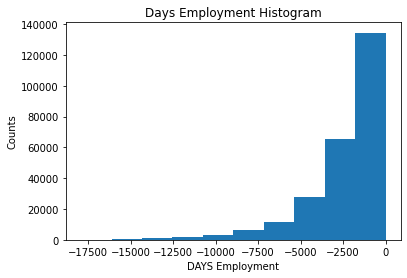

In [58]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('DAYS Employment')
plt.ylabel('Counts')

## 檢視 OWN_CAR_AGE 貸款人的車齡

Text(0, 0.5, 'Counts')

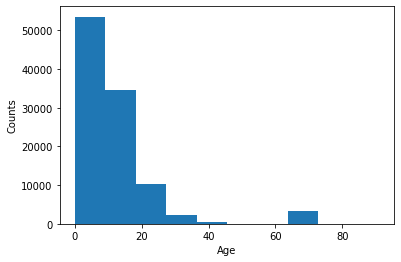

In [79]:
#過濾出 OWN_CAR_AGE中不為 NaN的數據
own_car_age = app_train[app_train['OWN_CAR_AGE'].notna()]["OWN_CAR_AGE"]
own_car_age.plot.hist('OWN_CAR_AGE histogram')
plt.xlabel('Age')
plt.ylabel('Counts')

In [67]:
## 檢視各車齡的數量
own_car_age.value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
47.0       1
48.0       1
56.0       1
50.0       1
57.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [70]:
## 檢視車齡大於50年的數據數量
own_car_age[own_car_age > 50].value_counts()

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64

In [85]:
## 檢視車齡(Own Car Age)大於等於50的數據是我們的目標的佔比(Target)
own_car_age_50 = app_train[app_train['OWN_CAR_AGE']>50]["TARGET"]
print('Target of WON_CAR AGE >= 50: %0.5f' % own_car_age_50.mean())

Target of WON_CAR AGE >= 50: 0.08361


In [87]:
## 檢視車齡(Own Car Age)小於50的數據是我們的目標的佔比(Target)
own_car_age_less_50 = app_train[app_train['OWN_CAR_AGE']<50]["TARGET"]
print('Target of WON_CAR AGE >= 50: %0.5f' % own_car_age_less_50.mean())

Target of WON_CAR AGE >= 50: 0.07207


In [91]:
app_train["OWN_CAR_AGE_ANOM"] = app_train['OWN_CAR_AGE']>50
app_train.loc[:, ['OWN_CAR_AGE', 'OWN_CAR_AGE_ANOM']]

,OWN_CAR_AGE,OWN_CAR_AGE_ANOM
0,NaN,False
1,NaN,False
2,26.0,False
3,NaN,False
4,NaN,False
...,...,...
307506,NaN,False
307507,NaN,False
307508,NaN,False
307509,NaN,False
